In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gensim
from utils import *

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Load data
tweets = load_tweets(r'C:\Users\Vojta-Acer\Desktop\Diplomka\dataProcessed\tweetsAAPL.csv')
market_master = load_prices(r'C:\Users\Vojta-Acer\Desktop\Diplomka\dataMarket\AAPL1min.csv')

tweets_hour = aggregate_tweets(tweets, 'hour', 'tokens')
tweets_5min = aggregate_tweets(tweets, '5min', 'tokens')
tweets_min = aggregate_tweets(tweets, 'min', 'tokens')
tweets_none = aggregate_tweets(tweets, 'none', 'tokens')


In [209]:
special = tweets_5min.iloc[:,:15]
#market = market_master.between_time('9:30', '16:00')
market = market_master.copy()

In [237]:
# Create label - s minusem je to dopredu, s plusem dozadu 
df = market.copy()
df['change'] = df['Close'].pct_change(10)
#df['volatility'] = np.abs(df['change'])
df['volatility'] = df['change']*df['change']

x = special.join(df['volatility']).dropna()
x['label'] = x['volatility'] < x['volatility'].median()

model = LogisticRegression(C=100,penalty='l2')

#x = x.sample(frac=1) # shuffle
train = x.iloc[:,:-2]
#train = x.loc[:,['tweet_count']]
label = x['label']

pred = cross_val_predict(model, train, label, cv=5, n_jobs=1, verbose=0)
evaluate(pred, label)

kappa: 0.07536231884057976
accuracy: 0.5376811594202898


In [228]:
d = {}
for i in list(range(-3000, 3000, 100)):
    if i == 0:
        continue
    df = market.copy()
    df['Lag'] = df['Close'].shift(i)
    df['change'] = (df['Lag'] - df['Close'] )/df['Close']
    df['volatility'] = np.abs(df['change'])
    df['volatility'] = df['change']*df['change']

    x = special.join(df['volatility']).dropna()
    x['label'] = x['volatility'] > x['volatility'].median()

    model = LogisticRegression(C=1,penalty='l2')
    input_df = x.iloc[:,:-2]
    #input_df = x.loc[:,['tweet_count']]
    pred = cross_val_predict(model, input_df, x['label'], cv=5, n_jobs=1, verbose=0)
    kappa = cohen_kappa_score(x['label'], pred)
    accuracy = accuracy_score(x['label'], pred)
    d[i] = [kappa, accuracy]

(-50.0, 50.0)

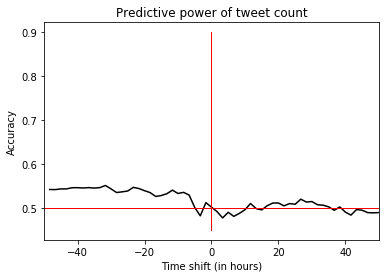

In [229]:
y = pd.DataFrame(d).T
y = y.reindex(y.index[::-1])
y.index = -1*(y.index/60)

plt.plot(y[1], color = 'black')
plt.plot([0, 0], [0.45, 0.9], 'r-', lw=1)
plt.plot([-3000, 3000], [0.5, 0.5], 'r-', lw=1)
plt.title('Predictive power of tweet count')
plt.xlabel('Time shift (in hours)')
plt.ylabel('Accuracy')
plt.xlim(-3000/60, 3000/60)

(-50.0, 50.0)

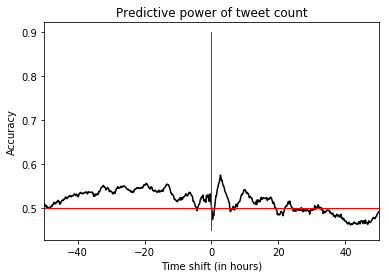

In [195]:
y = pd.DataFrame(d).T
y = y.reindex(y.index[::-1])
y.index = -1*(y.index/60)

plt.plot(y[1], color = 'black')
plt.plot([0, 0], [0.45, 0.9], 'r-', lw=1)
plt.plot([-3000, 3000], [0.5, 0.5], 'r-', lw=1)
plt.title('Predictive power of tweet count')
plt.xlabel('Time shift (in hours)')
plt.ylabel('Accuracy')
plt.xlim(-3000/60, 3000/60)

(-16.666666666666668, 16.666666666666668)

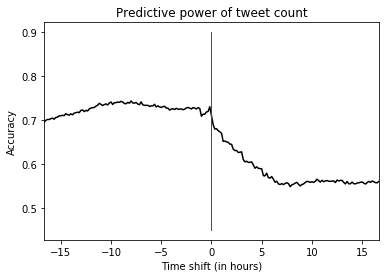

In [495]:
plt.plot(y[1], color = 'black')
plt.plot([0, 0], [0.45, 0.9], 'k-', lw=1, color = 'r')
#plt.plot([0, 0], [-0.45, 0.9], 'k-', lw=1, color = 'r')
plt.title('Predictive power of tweet count')
plt.xlabel('Time shift (in hours)')
plt.ylabel('Accuracy')
plt.xlim(-1000/60, 1000/60)

(-50.0, 50.0)

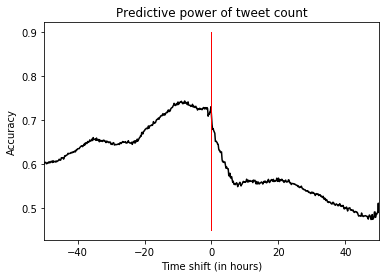

In [497]:
plt.plot(y[1], color = 'black')
plt.plot([0, 0], [0.45, 0.9], 'k-', lw=1, color = 'r')
plt.title('Predictive power of tweet count')
plt.xlabel('Time shift (in hours)')
plt.ylabel('Accuracy')
plt.xlim(-3000/60, 3000/60)

(-166.66666666666666, 166.66666666666666)

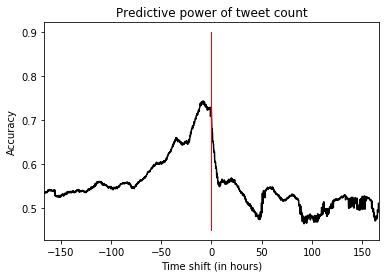

In [496]:
plt.plot(y[1], color = 'black')
plt.plot([0, 0], [0.45, 0.9], 'k-', lw=1, color = 'r')
plt.title('Predictive power of tweet count')
plt.xlabel('Time shift (in hours)')
plt.ylabel('Accuracy')
plt.xlim(-10000/60, 10000/60)